In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

datapath = '../../Data/Processed/titanic_reg_model.parquet'
savefile = '../../Data/Modeling/idade.csv'

# Carga dos Dados 

In [2]:
df = pd.read_parquet(datapath)

print('shape:', df.shape)
print('columns:', df.columns)


shape: (1309, 13)
columns: Index(['Sexo', 'Idade', 'IrmaosCasal', 'PaisFilhos', 'Tarifa', 'SolteiraPais',
       'Classe_2', 'Classe_3', 'PortoEmbarque_Q', 'PortoEmbarque_S',
       'Titulo_Casada', 'Titulo_Menino', 'Titulo_Solteira'],
      dtype='object')


In [3]:
trainIdade = df.dropna()
testIdade = df.loc[df['Idade'].isnull()].drop('Idade', axis=1)

print('shape do treino:', trainIdade.shape)
print('shape do teste:', testIdade.shape)

shape do treino: (1046, 13)
shape do teste: (263, 12)


# Treino / Teste 

In [4]:
X = trainIdade.drop('Idade', axis=1)
y = trainIdade['Idade']

X.shape, y.shape

((1046, 12), (1046,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=30)

print('shape do treino:', X_train.shape, y_train.shape)
print('shape do teste:', X_test.shape, y_test.shape)

shape do treino: (732, 12) (732,)
shape do teste: (314, 12) (314,)


# Treinando o modelo

In [6]:
lm = linear_model.LinearRegression(normalize=True)

lm.fit(X_train,y_train)

lm.score(X_test, y_test)

0.4841324849530547

In [7]:
y_test

PassengerId
1203    22.0
4       35.0
691     31.0
845     17.0
938     45.0
        ... 
608     27.0
41      40.0
10      14.0
903     46.0
867     27.0
Name: Idade, Length: 314, dtype: float64

# Predição da Idade

In [8]:
pred = lm.predict(X_test)
pred.shape

(314,)

# Score e Erros

In [9]:
lm.score(X_test, y_test)

0.4841324849530547

### Verificando MSE e RMSE


In [10]:
mse = mean_squared_error(y_test, pred)
mse

105.16330699431596

In [11]:
rmse = np.sqrt(mse)
rmse

10.254916235363211

# Visualizar residuos com Scater Plot

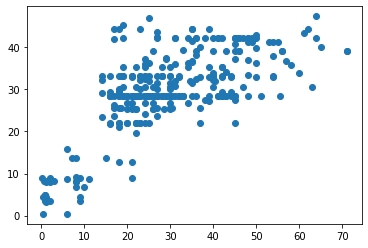

In [13]:
plt.scatter(y_test, pred)
plt.show()

# Aplicar Modelo nos dados nulos

In [14]:
testIdade.shape

(263, 12)

In [15]:
predIdade = lm.predict(testIdade)
predIdade

array([32.00577269, 33.09888976, 27.53649035, 25.36742702, 25.63024035,
       28.44875133, 41.97399035, 25.63024035, 25.36742702, 25.36742702,
       28.44875133, 31.94419883, 25.63024035, 25.24427929, 42.18031466,
       39.09899035,  0.40189176, 28.44875133, 28.44875133, 25.63024035,
       28.44875133, 28.44875133, 28.44875133, 28.44875133, 25.56774035,
       28.44875133, 32.00577269,  4.97399035, 29.39586535, 28.44875133,
       28.44875133,  3.97889825, 45.27086535, 42.18031466,  3.36006835,
        8.55211535, 30.01756545, 42.18031466, 34.11461535, 32.00577269,
       25.63024035, 29.80955885, 31.94419883, 28.44875133,  7.92711535,
       22.06774035, 18.92711535, 25.56774035, 28.44875133, 41.27086535,
       32.00577269, 25.63024035, 42.18031466, 25.63024035, 33.09888976,
       42.18031466, 39.09899035, 42.18031466, 25.63024035, 31.88262497,
       30.28649035, 28.44875133, 33.48961535, 29.80955885, 25.50524035,
       45.05211535, 28.44875133, 30.55211535, 42.18031466, 25.36

In [16]:
predIdade.shape

(263,)

# Criando coluna Idade com as prediçoes

In [17]:
testIdade['Idade'] = predIdade
testIdade.isnull().sum()

Sexo               0
IrmaosCasal        0
PaisFilhos         0
Tarifa             0
SolteiraPais       0
Classe_2           0
Classe_3           0
PortoEmbarque_Q    0
PortoEmbarque_S    0
Titulo_Casada      0
Titulo_Menino      0
Titulo_Solteira    0
Idade              0
dtype: int64

# Concatenando os dados de volta no DF

In [18]:
idade = pd.concat([trainIdade, testIdade], sort = False)

idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sexo             1309 non-null   int64  
 1   Idade            1309 non-null   float64
 2   IrmaosCasal      1309 non-null   int64  
 3   PaisFilhos       1309 non-null   int64  
 4   Tarifa           1309 non-null   float64
 5   SolteiraPais     1309 non-null   int64  
 6   Classe_2         1309 non-null   uint8  
 7   Classe_3         1309 non-null   uint8  
 8   PortoEmbarque_Q  1309 non-null   uint8  
 9   PortoEmbarque_S  1309 non-null   uint8  
 10  Titulo_Casada    1309 non-null   uint8  
 11  Titulo_Menino    1309 non-null   uint8  
 12  Titulo_Solteira  1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(7)
memory usage: 80.5 KB


In [19]:
df_idade = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})
df_idade

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.630240
1302,1302,25.630240
1305,1305,28.448751


# Exportação do Resultado 

In [20]:
df_idade.to_csv(savefile, index=False)